## Figure_6_ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Data preprocessing

In [2]:
df_pred_all_pheno=pd.read_csv('../Data/ML_Input/ML_input_Abs_pred_all_pheno_inv_boxcox.csv')
df_pred_all_pheno
df_pred_processed=df_pred_all_pheno.dropna()
df_pred_processed.isna().sum()

variant      0
COV2_2050    0
COV2_2082    0
COV2_2094    0
COV2_2096    0
COV2_2165    0
COV2_2479    0
COV2_2499    0
COV2_2677    0
COV2_2832    0
rCR3022      0
bind_avg     0
expr_avg     0
dtype: int64

In [3]:
X_RBD_Abs = df_pred_processed.drop(["variant","bind_avg", "expr_avg"], axis=1)
y_RBD_B = df_pred_processed["bind_avg"]
X_RBD_Abs.var()

COV2_2050    1.250221e-04
COV2_2082    1.120897e-04
COV2_2094    5.286270e-05
COV2_2096    3.406040e-04
COV2_2165    1.550281e-08
COV2_2479    1.956392e-05
COV2_2499    2.934766e-03
COV2_2677    2.945293e-04
COV2_2832    4.855796e-05
rCR3022      8.720258e-05
dtype: float64

In [4]:
scaler = StandardScaler()
X_RBD_Abs_scaled = pd.DataFrame(scaler.fit_transform(X_RBD_Abs),columns=X_RBD_Abs.columns)
X_RBD_Abs_scaled.var()

COV2_2050    1.00045
COV2_2082    1.00045
COV2_2094    1.00045
COV2_2096    1.00045
COV2_2165    1.00045
COV2_2479    1.00045
COV2_2499    1.00045
COV2_2677    1.00045
COV2_2832    1.00045
rCR3022      1.00045
dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_RBD_Abs_scaled, y_RBD_B, test_size=0.2, random_state=21)

### ML model with RandomForestRegressor

In [6]:
## Grid Search with Cross Validation
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [800, 1000, 1200]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 11.3min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

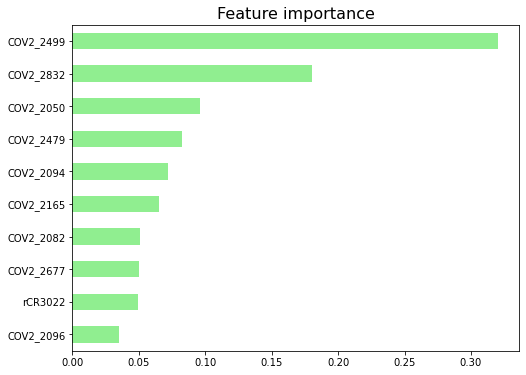

In [7]:
# model training
rf_best = RandomForestRegressor(n_estimators= 1200,min_samples_split= 3,min_samples_leaf= 2,max_features= 'auto', max_depth= 30, bootstrap=True, random_state = 42)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

# Create a pd.Series of features importances
importances_rf = pd.Series(rf_best.feature_importances_, index = X_RBD_Abs_scaled.columns)
# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()   
# Make a horizontal bar plot
plt.figure(figsize=(8,6))
sorted_importances_rf.plot(kind='barh', color='lightgreen'); 
plt.title('Feature importance', fontsize=16)
plt.show()